In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file1061.wav', 'file1059.wav', 'file1143.wav', 'file1115.wav', 'file1147.wav', 'file1135.wav', 'file1139.wav', 'file154.wav', 'file155.wav', 'file10.wav', 'file1.wav', 'file1047.wav', 'file1046.wav', 'file1048.wav', 'file1050.wav', 'file1049.wav', 'file1052.wav', 'file1053.wav', 'file1055.wav', 'file1054.wav', 'file1056.wav', 'file1057.wav', 'file1058.wav', 'file1060.wav', 'file1063.wav', 'file1065.wav', 'file1064.wav', 'file1067.wav', 'file1068.wav', 'file1069.wav', 'file1070.wav', 'file10735.wav', 'file10728.wav', 'file10737.wav', 'file10727.wav', 'file1072.wav', 'file10732.wav', 'file10734.wav', 'file1071.wav', 'file10736.wav', 'file1073.wav', 'file10746.wav', 'file10762.wav', 'file10741.wav', 'file10755.wav', 'file10750.wav', 'file10738.wav', 'file10740.wav', 'file10758.wav', 'file10744.wav', 'file10739.wav', 'file10754.wav', 'file10757.wav', 'file10743.wav', 'file10742.wav', 'file10759.wav', 'file10760.wav', 'file10745.wav', 'file10747.wav', 'file10763.wav', 'file10826.wav', 'fi

In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
2,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
3,-260.005402,122.213196,-19.668991,8.698288,-10.487801,-3.308214,-5.397858,-11.390374,-4.951897,-11.585847,5.326418,-15.468590,5.036489,0
4,-270.677155,111.855637,-19.062414,5.179912,-16.694443,-4.503492,-10.268575,-12.212496,-1.401393,-12.573609,5.653296,-16.340860,3.830790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-296.089111,90.251648,49.353138,40.109879,13.949716,15.968038,-11.017990,1.806876,-6.369140,3.860376,-8.479083,-1.914927,-10.282051,1
555,-334.378174,76.736237,1.568514,22.846909,-14.486498,-16.314674,-15.556476,-21.469236,-20.530735,-1.497289,-14.830498,-3.666535,-10.663058,1
556,-323.235352,69.085464,4.084009,22.119936,-11.278208,-25.925304,-23.227936,-21.648048,-9.808347,-1.174033,-23.784948,1.368763,-17.619230,1
557,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1


In [ ]:
def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    y_noise = y + noise_factor * noise
    return y_noise

In [ ]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_ruido'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com ruído
data_noise = []  # Dados com ruído
labels_noise = []  # Rótulos com ruído

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features)
    labels_noise.append(0)  # Rótulo "fake"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features_noise)
    labels_noise.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'fake' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path, 'fake', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features)
    labels_noise.append(1)  # Rótulo "real"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features_noise)
    labels_noise.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'real' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path, 'real', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído

In [ ]:
# Converter para DataFrame
df_noise = pd.DataFrame(data_noise)
df_noise['label'] = labels_noise

In [ ]:
df_noise

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-226.083854,51.113115,17.982003,15.820521,8.051505,-1.292376,-0.176670,2.529778,-8.720207,-10.117410,-9.461046,-7.316074,-7.152948,0
2,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
3,-209.793976,57.692947,-6.015765,5.806875,0.443027,-7.678764,-15.542554,-10.978784,-4.451176,-6.936024,-7.767115,-8.075106,-3.110616,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,-229.646092,31.239207,6.994247,11.658927,-6.890829,-15.193913,-17.208493,-14.496076,-8.740386,-3.659723,-11.258453,-1.639971,-8.544453,1
1114,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1
1115,-227.621435,42.490886,11.237582,6.180745,-9.253375,-18.189906,-15.902369,-9.605316,-10.674720,-6.219106,-10.822418,-3.645409,-7.670305,1
1116,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1


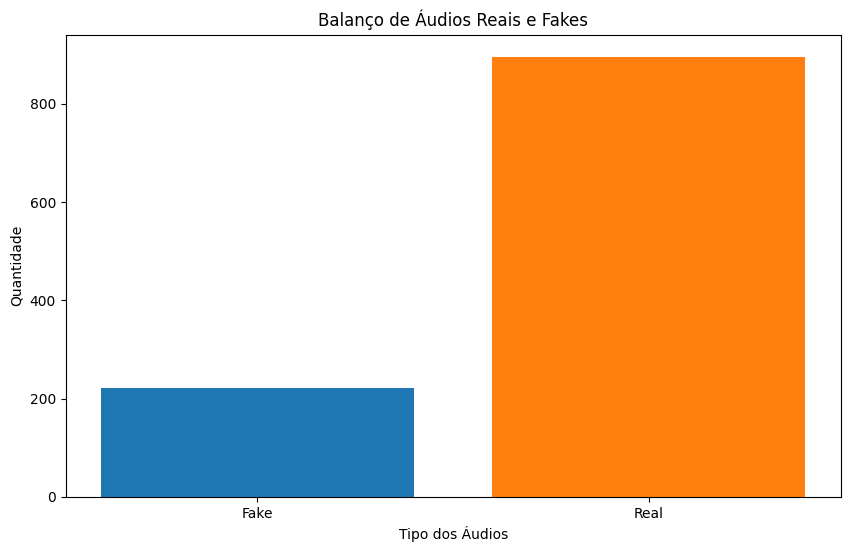

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_noise.count(0), labels_noise.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_noise.drop(columns=['label'])
y = df_noise['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3903 - loss: 12.4765
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7698 - loss: 1.9963
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7523 - loss: 0.9482
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7532 - loss: 0.7812
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7873 - loss: 0.6100
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8038 - loss: 0.5941
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8345 - loss: 0.4371
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8337 - loss: 0.4098
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8660 - loss: 0.3513
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8503 - loss: 0.3608
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.85
Precisão: 0.88
Recall: 0.94
F1-Score: 0.91


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.88
Recall: 0.98
F1-Score: 0.93


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.89
Precisão: 0.91
Recall: 0.95
F1-Score: 0.93


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.90
Recall: 0.96
F1-Score: 0.93


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 720, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 894, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.805369 -> initscore=1.420196
[LightGBM] [Info] Start training from score 1.420196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.91
Precisão: 0.93
Recall: 0.95
F1-Score: 0.94


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2231 - loss: 30.3955
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 2.2754
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7577 - loss: 0.9756
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.7633
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7824 - loss: 0.6656
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.4874
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7800 - loss: 0.6120
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7788 - loss: 0.5486
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4556
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8229 - loss: 0.4027
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.77
Precisão: 0.82
Recall: 0.90
F1-Score: 0.86


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.82
Precisão: 0.89
Recall: 0.89
F1-Score: 0.89


In [ ]:
output_path_balanced = '/content/drive/MyDrive/audios_FOR/amostra_FOR_ruido_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path_balanced, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path_balanced, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com ruído
data_noise_balanced = []  # Dados com ruído
labels_noise_balanced = []  # Rótulos com ruído

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features)
    labels_noise_balanced.append(0)  # Rótulo "fake"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features_noise)
    labels_noise_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'fake' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path_balanced, 'fake', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído balanceado

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features)
    labels_noise_balanced.append(1)  # Rótulo "real"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features_noise)
    labels_noise_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'real' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path_balanced, 'real', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído balanceado

In [ ]:
# Converter para DataFrame
df_noise_balanced = pd.DataFrame(data_noise_balanced)
df_noise_balanced['label'] = labels_noise_balanced

In [ ]:
df_noise_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-226.254504,50.712083,17.882787,15.333258,7.792458,-1.105165,0.926588,3.588045,-8.679595,-10.463620,-9.469052,-8.054246,-7.356878,0
2,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
3,-210.182034,56.933814,-6.854418,5.838657,0.458756,-7.212290,-15.221170,-11.513907,-4.651182,-7.052067,-7.387034,-8.487754,-3.703905,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-229.749891,31.006853,6.923406,11.265988,-7.351436,-15.338095,-17.217963,-14.735012,-8.760043,-3.747180,-11.279840,-2.013605,-8.402776,1
1788,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1
1789,-227.614580,42.248488,11.289917,6.325959,-9.319197,-18.297184,-15.730598,-9.283409,-10.637413,-6.383186,-10.803901,-3.629067,-7.643090,1
1790,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1


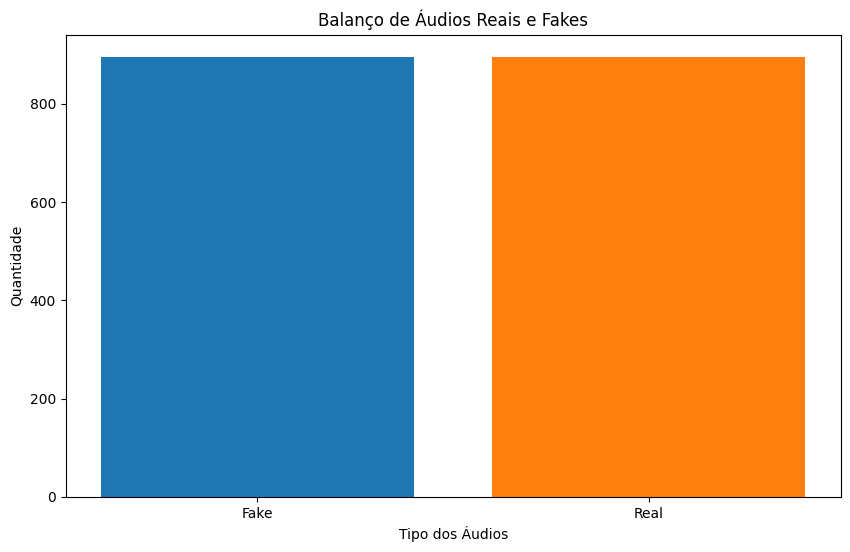

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_noise_balanced.count(0), labels_noise_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_noise_balanced.drop(columns=['label'])
y = df_noise_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5000 - loss: 8.5084
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5364 - loss: 1.2480
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6517 - loss: 0.6622
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5311
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7453 - loss: 0.5327
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4797
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7691 - loss: 0.4905
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7734 - loss: 0.4741
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4721
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4516
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.86
Precisão: 0.87
Recall: 0.84
F1-Score: 0.86


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.98
Precisão: 0.99
Recall: 0.97
F1-Score: 0.98


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.96
Recall: 0.89
F1-Score: 0.92


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.96
Precisão: 0.99
Recall: 0.93
F1-Score: 0.96


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 716, number of negative: 717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 1433, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499651 -> initscore=-0.001396
[LightGBM] [Info] Start training from score -0.001396


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.97
Precisão: 0.99
Recall: 0.94
F1-Score: 0.97


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5390 - loss: 9.6726 
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6489 - loss: 1.0584
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6886 - loss: 0.7729
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7415 - loss: 0.5715
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7240 - loss: 0.5648
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7494 - loss: 0.5185
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7135 - loss: 0.5588
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7366 - loss: 0.5188
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7630 - loss: 0.5012
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7853 - loss: 0.4641
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.81
Precisão: 0.83
Recall: 0.78
F1-Score: 0.80


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.93
Precisão: 0.95
Recall: 0.90
F1-Score: 0.93


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.75
Precisão: 0.69
Recall: 0.90
F1-Score: 0.78
